In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv('Data-clean/Preprocessed_only_txt_has_image_has_link.csv')

In [3]:
data.head()

,Unnamed: 0,tweets_Text,has_image,has_Link,tweets_ResponseCategory
0,0,initial reports suggest three rockets struck b...,0,0,1
1,1,senate approved stopgap spending bill order av...,1,1,2
2,2,seven people shot funeral home milwaukee treat...,1,1,1
3,3,clare bronfman heiress seagram liquor fortune ...,1,1,0
4,4,trump plans participate next two presidential ...,1,0,2


In [4]:
data.shape

(9944, 5)

In [5]:
data.dropna(subset=['tweets_Text'], inplace=True)

In [6]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [7]:
data.head()

,tweets_Text,has_image,has_Link,tweets_ResponseCategory
0,initial reports suggest three rockets struck b...,0,0,1
1,senate approved stopgap spending bill order av...,1,1,2
2,seven people shot funeral home milwaukee treat...,1,1,1
3,clare bronfman heiress seagram liquor fortune ...,1,1,0
4,trump plans participate next two presidential ...,1,0,2


In [8]:
data.shape

(9940, 4)

In [9]:
data.to_csv('./Data-clean/Processed_major_cols.csv')

In [10]:
labels = data["tweets_ResponseCategory"]
data.drop("tweets_ResponseCategory", axis=1, inplace=True)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, random_state=42)

In [12]:
X_train.head()

,tweets_Text,has_image,has_Link
715,another 24 million americans filed firsttime u...,1,1
809,jared kushner attempts clarify comments questi...,1,1
3206,english soccer team leicester city says billio...,1,0
7536,british airways says computer systems fixed ou...,1,0
6439,green slime oozed onto detroit interstate stop...,1,0


Word Cloud

In [13]:
dataTrain=pd.concat([X_train, y_train], axis=1)

In [14]:
dataTrain.head()

,tweets_Text,has_image,has_Link,tweets_ResponseCategory
715,another 24 million americans filed firsttime u...,1,1,1
809,jared kushner attempts clarify comments questi...,1,1,2
3206,english soccer team leicester city says billio...,1,0,1
7536,british airways says computer systems fixed ou...,1,0,0
6439,green slime oozed onto detroit interstate stop...,1,0,2


In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [16]:
# word cloud

low_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 0]
moderate_df = dataTrain.loc[dataTrain.tweets_ResponseCategory == 1]
high_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 2]


low_array = np.array(low_df['tweets_Text'])
moderate_array=np.array(moderate_df['tweets_Text'])
high_array=np.array(high_df['tweets_Text'])

low_text = ''.join(low_array)
moderate_text= ''.join(moderate_array)
high_text=''.join(high_array)

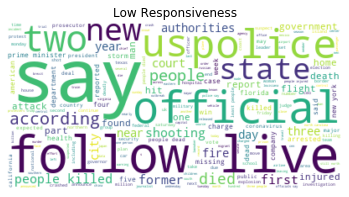

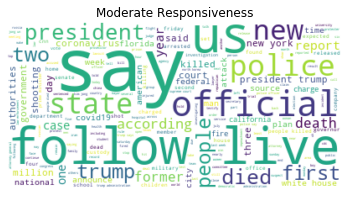

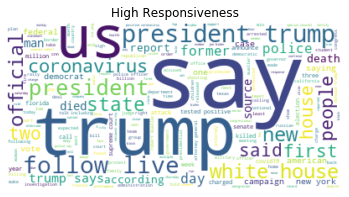

In [17]:
#low
wordcloud = WordCloud(background_color="white").generate(low_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Low Responsiveness')
plt.show()

#moderate
wordcloud = WordCloud(background_color="white").generate(moderate_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Moderate Responsiveness')
plt.show()

#high
wordcloud = WordCloud(background_color="white").generate(high_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('High Responsiveness')
plt.show()

# Tokenizer

In [18]:
max_len=X_train.tweets_Text.map(lambda x: len(x)).max() 
print(max_len)

222


In [19]:
def get_tweetText(data):
    data_text=data[['tweets_Text']]
    return data_text

In [20]:
train_text=get_tweetText(X_train)
val_text=get_tweetText(X_val)

In [21]:
max_features=25000

In [22]:
from keras.utils import to_categorical
def tokenizer_(train_x, val_x, max_features, maxlen):
    

    train_X = train_x['tweets_Text']
    val_X = val_x['tweets_Text']
    

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))

    train_X = tokenizer.texts_to_sequences(train_X)
    train_X = pad_sequences(train_X, maxlen=maxlen)
    val_X = tokenizer.texts_to_sequences(val_X)
    val_X = pad_sequences(val_X, maxlen=maxlen)

    return train_X, val_X, tokenizer

In [23]:
train_X_tokenized, val_X_tokenized , tokenizer= tokenizer_(X_train, X_val, max_features, max_len)

Label Encoding 

In [24]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)
##THESE are the final labels
train_Y = to_categorical(y_train_le)
val_Y = to_categorical(y_val_le)

Complete dataframe

In [25]:
#X_train_new = X_train.reset_index(drop=True)
#train_X_tokenized_new = train_X_tokenized.reset_index(drop=True)

In [26]:
#X_val_new = X_val.reset_index(drop=True)
#val_X_tokenized_new = val_X_tokenized.reset_index(drop=True)

In [27]:
X_train_new=X_train[:]
X_val_new=X_val[:]

In [28]:
X_train_new.drop(["tweets_Text"], axis=1, inplace=True)
X_val_new.drop(["tweets_Text"], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
X_train_new.head()

,has_image,has_Link
715,1,1
809,1,1
3206,1,0
7536,1,0
6439,1,0


In [30]:
X_train_new.to_numpy()
X_val_new.to_numpy()

array([[0, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [37]:
X_train_new[:4]

,has_image,has_Link
715,1,1
809,1,1
3206,1,0
7536,1,0


In [31]:
X_train_df=np.concatenate(( train_X_tokenized, X_train_new), axis=1)


In [ ]:
X_val_df=np.concatenate((val_X_tokenized, X_val_new), axis=1)

In [32]:
X_train_df[:4]

array([[   1,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [33]:
X_val_df=np.concatenate((X_val_new, val_X_tokenized), axis=1)

In [38]:
X_val_df.shape

(1988, 224)

# Models

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Sequential
from keras import layers
from keras import models

# 1. Vanilla RNN 

# 1.1 Feature:Only Tweet Text

The feature set only has the tweet

In [35]:
vanilla_rnn = models.Sequential()
vanilla_rnn.add(layers.Embedding(max_features, 8, input_length=max_len))
vanilla_rnn.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn.add(layers.Dense(3, activation='softmax'))
vanilla_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 222, 8)            200000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               17536     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [36]:
vanilla_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn.fit(train_X_tokenized,
                    train_Y, 
                    batch_size=50, 
                    epochs=10, 
                    validation_data=(val_X_tokenized, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/10
160/160 [==============================] - 14s 89ms/step - loss: 1.1120 - accuracy: 0.3348 - val_loss: 1.0973 - val_accuracy: 0.3521
Epoch 2/10
160/160 [==============================] - 14s 89ms/step - loss: 1.1078 - accuracy: 0.3485 - val_loss: 1.1021 - val_accuracy: 0.3707
Epoch 3/10
160/160 [==============================] - 15s 92ms/step - loss: 1.0940 - accuracy: 0.3730 - val_loss: 1.0930 - val_accuracy: 0.3753
Epoch 4/10
160/160 [==============================] - 19s 116ms/step - loss: 1.0537 - accuracy: 0.4535 - val_loss: 1.1169 - val_accuracy: 0.3556
Epoch 5/10
160/160 [==============================] - 20s 123ms/step - loss: 0.9689 - accuracy: 0.5700 - val_loss: 1.1140 - val_accuracy: 0.4054
Epoch 6/10
160/160 [==============================] - 20s 126ms/step - loss: 0.8156 - accuracy: 0.6427 - val_loss: 1.1761 - val_accuracy: 0.4014
Epoch 7/10
160/160 [==============================] - 21s 128ms/step - loss: 0.6823 - accuracy: 0.7072 - val_loss: 1.2850 - val_accur

# 1.2  Feature: Tweets+ links and image column

In [44]:
vanilla_rnn2 = models.Sequential()
vanilla_rnn2.add(layers.Embedding(max_features, 8, input_length=max_len+2))
vanilla_rnn2.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn2.add(layers.Dense(3, activation='softmax'))
vanilla_rnn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 224, 8)            200000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 128)               17536     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [45]:
vanilla_rnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn2.fit(X_train_df,
                    train_Y, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(X_val_df, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/50
249/249 [==============================] - 43s 174ms/step - loss: 1.1074 - accuracy: 0.3382 - val_loss: 1.0944 - val_accuracy: 0.3501
Epoch 2/50
249/249 [==============================] - 33s 133ms/step - loss: 1.0979 - accuracy: 0.3917 - val_loss: 1.1138 - val_accuracy: 0.3285
Epoch 3/50
249/249 [==============================] - 23s 91ms/step - loss: 1.0721 - accuracy: 0.4245 - val_loss: 1.0887 - val_accuracy: 0.3667
Epoch 4/50
249/249 [==============================] - 22s 90ms/step - loss: 1.0387 - accuracy: 0.4733 - val_loss: 1.0982 - val_accuracy: 0.3808
Epoch 5/50
249/249 [==============================] - 23s 93ms/step - loss: 0.9802 - accuracy: 0.5272 - val_loss: 1.0864 - val_accuracy: 0.4155
Epoch 6/50
249/249 [==============================] - 23s 94ms/step - loss: 0.9128 - accuracy: 0.5640 - val_loss: 1.1091 - val_accuracy: 0.4472
Epoch 7/50
249/249 [==============================] - 21s 86ms/step - loss: 0.8643 - accuracy: 0.6002 - val_loss: 1.1195 - val_accurac

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vanilla RNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vanilla RNN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()